In [1]:
#importing packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import nltk
import datetime
from os import path
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error, confusion_matrix, classification_report, f1_score, roc_auc_score
from dateutil.relativedelta import relativedelta
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from pycaret.classification import *

Importing DataBase

In [2]:
statd = pd.read_csv("statd.csv")

In [3]:
statd = statd.fillna('N/A')

In [4]:
statd = statd.query("diet != 'N/A'")

In [5]:
statd

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,income,...,pacific islander,native american,middle eastern,indian,location,sign,religion,education,offspring,lang_spoken
0,22,single,m,straight,a little extra,anything,socially,never,190.0,104319.248826,...,0,0,0,0,california,gemini,agnosticism,Not Graduated,No Kids,1
1,35,single,m,straight,average,other,often,sometimes,178.0,80000.000000,...,0,0,0,0,california,cancer,agnosticism,Not Graduated,No Kids,3
2,38,available,m,straight,thin,anything,socially,N/A,173.0,104319.248826,...,0,0,0,0,california,pisces,N/A,Post Graduate,N/A,3
3,23,single,m,straight,thin,vegetarian,socially,N/A,180.0,20000.000000,...,0,0,0,0,california,pisces,N/A,Not Graduated,No Kids,2
5,29,single,m,straight,average,anything,socially,N/A,170.0,104319.248826,...,0,0,0,0,california,taurus,atheism,Graduated,No Kids,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59927,25,single,f,straight,average,anything,socially,never,155.0,104319.248826,...,0,0,0,0,california,virgo,atheism,Graduated,No Kids,2
59928,32,single,m,bisexual,thin,anything,socially,N/A,175.0,104319.248826,...,0,0,0,0,california,N/A,judaism,Graduated,N/A,2
59933,24,single,m,straight,fit,anything,often,sometimes,183.0,104319.248826,...,0,0,0,0,california,leo,agnosticism,Not Graduated,No Kids,1
59934,42,single,m,straight,average,anything,not at all,never,180.0,100000.000000,...,0,0,0,0,california,sagittarius,christianity,Post Graduate,No Kids,1


In [6]:
statd.dtypes

age                   int64
status               object
sex                  object
orientation          object
body_type            object
diet                 object
drinks               object
drugs                object
height              float64
income              float64
job                  object
smokes               object
asian                 int64
white                 int64
black                 int64
other                 int64
hispanic / latin      int64
pacific islander      int64
native american       int64
middle eastern        int64
indian                int64
location             object
sign                 object
religion             object
education            object
offspring            object
lang_spoken           int64
dtype: object

PyCaret Analysis for the best possible label choice

In [7]:
s = setup(statd, target = 'diet', categorical_features = ['status', 'sex', 'orientation', 'body_type', 'drinks', 'smokes', 'drugs', 'job', 'asian', 'white', 'black', 'other', 'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian', 'location', 'sign', 'religion', 'education', 'offspring'], numeric_features = ['height', 'income', 'age', 'lang_spoken'], ordinal_features = None, remove_outliers = True, session_id = 1312)

,Description,Value
0,Session id,1312
1,Target,diet
2,Target type,Multiclass
3,Target mapping,"anything: 0, halal: 1, kosher: 2, other: 3, vegan: 4, vegetarian: 5"
4,Original data shape,"(35548, 27)"
5,Transformed data shape,"(34303, 105)"
6,Transformed train set shape,"(23638, 105)"
7,Transformed test set shape,"(10665, 105)"
8,Ordinal features,10
9,Numeric features,4


In [8]:
best_sm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7848,0.0000,0.7848,0.6815,0.6969,0.0282,0.0794,3.3450
lr,Logistic Regression,0.7843,0.5582,0.7843,0.6151,0.6894,0.0000,0.0000,7.3170
dummy,Dummy Classifier,0.7843,0.5000,0.7843,0.6151,0.6894,0.0000,0.0000,3.3300
rf,Random Forest Classifier,0.7834,0.6779,0.7834,0.6766,0.6950,0.0199,0.0557,5.1360
lightgbm,Light Gradient Boosting Machine,0.7813,0.6896,0.7813,0.6838,0.7034,0.0583,0.1031,5.1450
gbc,Gradient Boosting Classifier,0.7812,0.7047,0.7812,0.6841,0.7005,0.0483,0.0907,15.1680
et,Extra Trees Classifier,0.7796,0.6700,0.7796,0.6793,0.7014,0.0475,0.0842,5.6640
nb,Naive Bayes,0.7771,0.5797,0.7771,0.6270,0.6877,0.0079,0.0189,3.0230
knn,K Neighbors Classifier,0.7703,0.5517,0.7703,0.6539,0.6938,0.0243,0.0396,10.5300
lda,Linear Discriminant Analysis,0.7618,0.6950,0.7618,0.6943,0.7036,0.0929,0.1151,3.6360


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [9]:
evaluate_model(best_sm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Creating the 2 dataframes we are going to use throughout the analysis: the inputs and the label

In [6]:
statd.isna().sum()

age                 0
status              0
sex                 0
orientation         0
body_type           0
diet                0
drinks              0
drugs               0
height              0
income              0
job                 0
smokes              0
asian               0
white               0
black               0
other               0
hispanic / latin    0
pacific islander    0
native american     0
middle eastern      0
indian              0
location            0
sign                0
religion            0
education           0
offspring           0
lang_spoken         0
dtype: int64

In [7]:
label = statd["diet"]
statd2 = statd.drop("diet", axis = 1)

In [8]:
statd2.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'drinks', 'drugs',
       'height', 'income', 'job', 'smokes', 'asian', 'white', 'black', 'other',
       'hispanic / latin', 'pacific islander', 'native american',
       'middle eastern', 'indian', 'location', 'sign', 'religion', 'education',
       'offspring', 'lang_spoken'],
      dtype='object')

In [9]:
statd2.columns = [col.replace(" ", "_") for col in statd2.columns]

In [10]:
#there are columns already converted to dummies, and also there are numeric type columns
#I check the rest and call pandas' get_dummies function to convert all categoric data to numeric for statistical analysis
object_columns = statd2.select_dtypes(include=['object']).columns

In [11]:
object_columns

Index(['status', 'sex', 'orientation', 'body_type', 'drinks', 'drugs', 'job',
       'smokes', 'location', 'sign', 'religion', 'education', 'offspring'],
      dtype='object')

In [12]:
statd_objects = statd2[object_columns]
df_encoded = pd.get_dummies(statd_objects, prefix=statd_objects.columns)
df_noredundance = pd.get_dummies(statd_objects, prefix=statd_objects.columns, drop_first = True)

In [13]:
df_encoded.columns

Index(['status_available', 'status_married', 'status_seeing someone',
       'status_single', 'status_unknown', 'sex_f', 'sex_m',
       'orientation_bisexual', 'orientation_gay', 'orientation_straight',
       ...
       'religion_islam', 'religion_judaism', 'religion_other',
       'education_Graduated', 'education_N/A', 'education_Not Graduated',
       'education_Post Graduate', 'offspring_Has Kids', 'offspring_N/A',
       'offspring_No Kids'],
      dtype='object', length=125)

In [14]:
df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.contains("N/A")]

In [15]:
df_noredundance = df_noredundance.loc[:, ~df_noredundance.columns.str.contains("N/A")]

In [16]:
df_encoded.shape

(35548, 117)

In [17]:
#completing our input dataset ready for analysis
numeric_df = statd[statd.select_dtypes(exclude=['object']).columns]
stat_df = pd.concat([df_encoded, numeric_df], axis = 1)

Gradient Boosting and Initial Tests for Classification Models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(stat_df, label, test_size=0.3, random_state = 1312)

In [23]:
best_train_f1 = 0
best_train_auc = 0
best_n_estimators = 0
best_max_features = 0
best_max_depth = 0

for n in range(1,10):
    for m in range(2,5):
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=n, max_depth=m)
        model.fit(X_train, y_train)

        # Calculate F1 score for training set
        f1_train = f1_score(y_train, model.predict(X_train), average='weighted')

        # Calculate ROC-AUC score for training set
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')

        if f1_train > best_train_f1:
            best_train_f1 = f1_train
            best_train_auc = roc_auc_train
            best_n_estimators = 100
            best_max_features = n
            best_max_depth = m

#        if acc_val > best_val_accuracy:
#           best_val_accuracy = acc_val

# Create and train the best model using the optimal hyperparameters
best_model = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=0.1, max_features=best_max_features, max_depth=best_max_depth)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_features: {best_max_features}")
print(f"max_depth: {best_max_depth}")
print("Best Train F1 Score:", best_train_f1)
print("Best Train AUC-ROC:", best_train_auc)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Best Hyperparameters:
n_estimators: 100
max_features: 9
max_depth: 4
Best Train F1 Score: 0.7131061864553673
Best Train AUC-ROC: 0.8529740297418845
Confusion Matrix:
[[8305   22    8    2    4   43]
 [  14    7    0    0    0    1]
 [  37    0    0    0    0    0]
 [ 503    4    1    0    1   18]
 [ 215    1    1    1    1    7]
 [1407    3    1    0    0   58]]
Classification Report
              precision    recall  f1-score   support

    anything       0.79      0.99      0.88      8384
       halal       0.19      0.32      0.24        22
      kosher       0.00      0.00      0.00        37
       other       0.00      0.00      0.00       527
       vegan       0.17      0.00      0.01       226
  vegetarian       0.46      0.04      0.07      1469

    accuracy                           0.78     10665
   macro avg       0.27      0.23      0.20     10665
weighted avg       0.69      0.78      0.70     10665



In [24]:
feature_importances = best_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a list of feature names and their corresponding importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by importance in descending order
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print the feature names and their importances
selected_features = []  # Initialize an empty list to store selected feature names
count = 0

for feature, importance in feature_importance_list:
    if importance > 0.01:
        selected_features.append(feature)  # Add the feature to the list
        print(f"Feature: {feature}, Importance: {importance}")

Feature: asian, Importance: 0.06815095081870941
Feature: sex_m, Importance: 0.05869023294248959
Feature: age, Importance: 0.04796255177852055
Feature: religion_catholicism, Importance: 0.038642554353586225
Feature: height, Importance: 0.03844710271444213
Feature: drinks_rarely, Importance: 0.035321408399852455
Feature: religion_buddhism, Importance: 0.034790522923714755
Feature: sex_f, Importance: 0.03431589273081449
Feature: religion_other, Importance: 0.03329455146475045
Feature: religion_christianity, Importance: 0.030366923545881844
Feature: religion_hinduism, Importance: 0.028344664305892837
Feature: orientation_bisexual, Importance: 0.023629145917300934
Feature: indian, Importance: 0.021608465177235178
Feature: job_artistic / musical / writer, Importance: 0.01981185765763598
Feature: drinks_socially, Importance: 0.019322306123778978
Feature: lang_spoken, Importance: 0.01929614308936941
Feature: drugs_never, Importance: 0.01897899007940473
Feature: drinks_not at all, Importance: 0

Statistical Analysis

In [18]:
label.describe()

count        35548
unique           6
top       anything
freq         27879
Name: diet, dtype: object

In [19]:
statd['height'].groupby(statd['diet']).describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
anything,27879.0,173.948492,9.873702,91.0,168.0,175.0,180.0,241.0
halal,77.0,176.779221,10.395626,150.0,170.0,178.0,183.0,211.0
kosher,115.0,173.686957,11.085288,152.0,166.5,173.0,183.0,201.0
other,1790.0,173.503352,11.193643,91.0,165.0,173.0,180.0,241.0
vegan,702.0,171.971510,9.735989,147.0,165.0,171.5,178.0,201.0
vegetarian,4985.0,171.730191,9.893840,127.0,165.0,170.0,178.0,241.0


In [20]:
statd['age'].groupby(statd['diet']).describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
anything,27879.0,31.687076,9.157599,18.0,25.0,29.0,36.0,69.0
halal,77.0,27.610390,6.230561,18.0,23.0,26.0,31.0,50.0
kosher,115.0,30.165217,9.243234,18.0,23.0,27.0,34.0,61.0
other,1790.0,33.640782,10.760621,18.0,26.0,31.0,39.0,109.0
vegan,702.0,31.007123,8.936051,18.0,25.0,29.0,34.0,69.0
vegetarian,4985.0,32.768706,10.102944,18.0,26.0,30.0,37.0,69.0


In [21]:
statd['income'].groupby(statd['diet']).describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
anything,27879.0,104104.240205,89982.691081,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
halal,77.0,160670.690812,248926.175906,20000.0,80000.000000,104319.248826,104319.248826,1000000.0
kosher,115.0,175028.373137,260196.506712,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
other,1790.0,117030.896740,149516.291170,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
vegan,702.0,109954.188569,135009.201692,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
vegetarian,4985.0,104619.181488,91911.592192,20000.0,104319.248826,104319.248826,104319.248826,1000000.0


In [22]:
diet_counts = statd['diet'].value_counts()

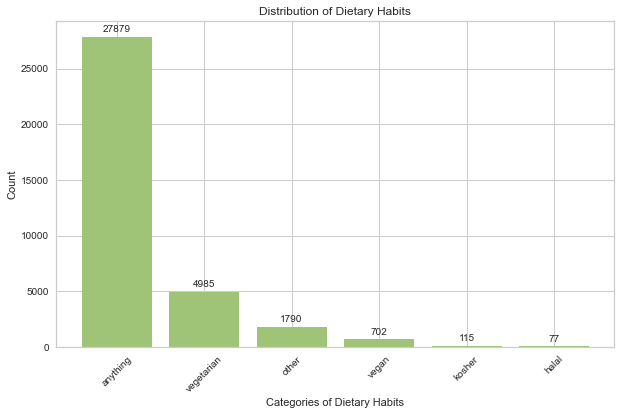

In [23]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(diet_counts.index, diet_counts)

# Add labels and title
plt.xlabel('Categories of Dietary Habits')
plt.ylabel('Count')
plt.title('Distribution of Dietary Habits')
bars = plt.bar(diet_counts.index, diet_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')


# Show the plot
plt.show()

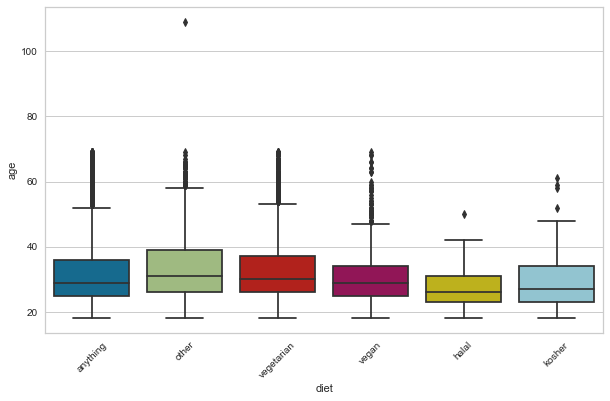

In [24]:
# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.xticks(rotation=45)
# Create the boxplot
sns.boxplot(x='diet', y='age', data=statd)

# Show the plot
plt.show()

In [25]:
statd['height'].groupby(statd['diet']).describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
anything,27879.0,173.948492,9.873702,91.0,168.0,175.0,180.0,241.0
halal,77.0,176.779221,10.395626,150.0,170.0,178.0,183.0,211.0
kosher,115.0,173.686957,11.085288,152.0,166.5,173.0,183.0,201.0
other,1790.0,173.503352,11.193643,91.0,165.0,173.0,180.0,241.0
vegan,702.0,171.971510,9.735989,147.0,165.0,171.5,178.0,201.0
vegetarian,4985.0,171.730191,9.893840,127.0,165.0,170.0,178.0,241.0


In [26]:
ds_contingency_table = pd.crosstab(label, statd2.sex)
ds_contingency_table

sex,f,m
diet,,
anything,10253,17626
halal,17,60
kosher,47,68
other,767,1023
vegan,359,343
vegetarian,2759,2226


In [27]:
# Perform chi-squared test
ds_chi2, ds_p, ds_dof, ds_expected = chi2_contingency(ds_contingency_table)

ds_n = ds_contingency_table.sum().sum()
ds_cramer_v = np.sqrt(ds_chi2 / (ds_n * min(ds_contingency_table.shape) - 1))

# Print results
print("Chi-squared:", ds_chi2)
print("P-value:", ds_p)
print("Degrees of freedom:", ds_dof)
print("\nContingency Table:")
print(ds_contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(ds_expected, index=ds_contingency_table.index, columns=ds_contingency_table.columns))
print("\nCramer's V:", ds_cramer_v)

Chi-squared: 662.7631250037167
P-value: 5.516157546488699e-141
Degrees of freedom: 5

Contingency Table:
sex             f      m
diet                    
anything    10253  17626
halal          17     60
kosher         47     68
other         767   1023
vegan         359    343
vegetarian   2759   2226

Expected Frequencies:
sex                    f             m
diet                                  
anything    11138.110667  16740.889333
halal          30.762743     46.237257
kosher         45.944357     69.055643
other         715.133903   1074.866097
vegan         280.460335    421.539665
vegetarian   1991.587994   2993.412006

Cramer's V: 0.09655163649828029


In [28]:
dr_contingency_table = pd.crosstab(label, statd2.asian)

# Perform chi-squared test
dr_chi2, dr_p, dr_dof, dr_expected = chi2_contingency(dr_contingency_table)

dr_n = dr_contingency_table.sum().sum()
dr_cramer_v = np.sqrt(dr_chi2 / (dr_n * min(dr_contingency_table.shape) - 1))

# Print results
print("Chi-squared:", dr_chi2)
print("P-value:", dr_p)
print("Degrees of freedom:", dr_dof)
print("\nContingency Table:")
print(dr_contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(dr_expected, index=dr_contingency_table.index, columns=dr_contingency_table.columns))
print("\nCramer's V:", dr_cramer_v)

Chi-squared: 375.84442018014573
P-value: 4.7556952008830904e-79
Degrees of freedom: 5

Contingency Table:
asian           0     1
diet                   
anything    23496  4383
halal          67    10
kosher        110     5
other        1627   163
vegan         653    49
vegetarian   4660   325

Expected Frequencies:
asian                  0            1
diet                                 
anything    24008.659475  3870.340525
halal          66.310369    10.689631
kosher         99.034967    15.965033
other        1541.500788   248.499212
vegan         604.543884    97.456116
vegetarian   4292.950518   692.049482

Cramer's V: 0.07270838936243067


In [29]:
ed_contingency_table = pd.crosstab(label, statd2.religion)

# Perform chi-squared test
ed_chi2, ed_p, ed_dof, ed_expected = chi2_contingency(ed_contingency_table)

ed_n = ed_contingency_table.sum().sum()
ed_cramer_v = np.sqrt(ed_chi2 / (ed_n * min(ed_contingency_table.shape) - 1))

# Print results
print("Chi-squared:", ed_chi2)
print("P-value:", ed_p)
print("Degrees of freedom:", ed_dof)
print("\nContingency Table:")
print(ed_contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(ed_expected, index=ed_contingency_table.index, columns=ed_contingency_table.columns))
print("\nCramer's V:", ed_cramer_v)

Chi-squared: 7029.375725777484
P-value: 0.0
Degrees of freedom: 45

Contingency Table:
religion     N/A  agnosticism  atheism  buddhism  catholicism  christianity  \
diet                                                                          
anything    8237         4642     3611       778         2596          3016   
halal         14            3        8         3            0             2   
kosher        11            5        6         2            4            10   
other        371          215      198        88          120           198   
vegan        172           99      167        53            9            26   
vegetarian  1342          824      773       319          159           241   

religion    hinduism  islam  judaism  other  
diet                                         
anything         158     44     1312   3485  
halal              3     32        1     11  
kosher             0      0       53     24  
other             15      5       81    499  
vega

In [32]:
statd.groupby('diet')['age'].mean()

diet
anything      31.687076
halal         27.610390
kosher        30.165217
other         33.640782
vegan         31.007123
vegetarian    32.768706
Name: age, dtype: float64

In [36]:
# Calculate group means
age_group_means = statd.groupby('diet')['age'].mean()

# Calculate total mean
age_total_mean = statd['age'].mean()

# Calculate the sum of squares between groups
age_ssb = ((age_group_means - age_total_mean) ** 2).sum()

# Calculate the total sum of squares
age_sst = ((statd['age'] - age_total_mean) ** 2).sum()

# Calculate the sum of squares within (SSW)
age_ssw = age_sst - age_ssb

# Calculate the standard deviation within categories
age_std_within = (age_ssw / (len(statd['age']) - len(age_group_means))) ** 0.5

print(f'Sum of Squares Between (SSB): {age_ssb}')
print(f'Sum of Squares Within (SSW): {age_ssw}')
print(f'Standard Deviation Within Categories: {age_std_within}')

# Calculate H^2
age_h_squared = age_ssb / age_sst

print(f'H^2 (Eta-squared): {age_h_squared}')

Sum of Squares Between (SSB): 26.12834859925119
Sum of Squares Within (SSW): 3135168.6303720037
Standard Deviation Within Categories: 9.392031084180845
H^2 (Eta-squared): 8.333883732924311e-06


In [37]:
# Calculate group means
height_group_means = statd.groupby('diet')['height'].mean()

# Calculate total mean
height_total_mean = statd['height'].mean()

# Calculate the sum of squares between groups
height_ssb = ((height_group_means - height_total_mean) ** 2).sum()

# Calculate the total sum of squares
height_sst = ((statd['height'] - height_total_mean) ** 2).sum()

# Calculate the sum of squares within (SSW)
height_ssw = height_sst - height_ssb

# Calculate the standard deviation within categories
height_std_within = (height_ssw / (len(statd['height']) - len(height_group_means))) ** 0.5

print(f'Sum of Squares Between (SSB): {height_ssb}')
print(f'Sum of Squares Within (SSW): {height_ssw}')
print(f'Standard Deviation Within Categories: {height_std_within}')

# Calculate H^2
height_h_squared = height_ssb / height_sst

print(f'H^2 (Eta-squared): {height_h_squared}')

Sum of Squares Between (SSB): 16.39681155478663
Sum of Squares Within (SSW): 3541969.975530068
Standard Deviation Within Categories: 9.982780142496342
H^2 (Eta-squared): 4.629270084951407e-06


In [38]:
# Calculate group means
income_group_means = statd.groupby('diet')['income'].mean()

# Calculate total mean
income_total_mean = statd['income'].mean()

# Calculate the sum of squares between groups
income_ssb = ((income_group_means - income_total_mean) ** 2).sum()

# Calculate the total sum of squares
income_sst = ((statd['income'] - income_total_mean) ** 2).sum()

# Calculate the sum of squares within (SSW)
income_ssw = income_sst - income_ssb

# Calculate the standard deviation within categories
income_std_within = (income_ssw / (len(statd['income']) - len(income_group_means))) ** 0.5

print(f'Sum of Squares Between (SSB): {income_ssb}')
print(f'Sum of Squares Within (SSW): {income_ssw}')
print(f'Standard Deviation Within Categories: {income_std_within}')

# Calculate H^2
income_h_squared = income_ssb / income_sst

print(f'H^2 (Eta-squared): {income_h_squared}')

Sum of Squares Between (SSB): 8090562718.968759
Sum of Squares Within (SSW): 334117433496685.75
Standard Deviation Within Categories: 96956.88118889785
H^2 (Eta-squared): 2.421414150189353e-05


Analysis with Machine Learning

In [39]:
boosted_df = pd.DataFrame()
boosted_df = stat_df[selected_features]
boosted_df

,asian,sex_m,age,religion_catholicism,height,drinks_rarely,religion_buddhism,sex_f,religion_other,religion_christianity,...,drugs_never,drinks_not at all,income,orientation_straight,body_type_rather not say,drinks_often,status_single,religion_atheism,job_sales / marketing / biz dev,native american
0,1,1,22,0,190.0,0,0,0,0,0,...,1,0,104319.248826,1,0,0,1,0,0,0
1,0,1,35,0,178.0,0,0,0,0,0,...,0,0,80000.000000,1,0,1,1,0,0,0
2,0,1,38,0,173.0,0,0,0,0,0,...,0,0,104319.248826,1,0,0,0,0,0,0
3,0,1,23,0,180.0,0,0,0,0,0,...,0,0,20000.000000,1,0,0,1,0,0,0
5,0,1,29,0,170.0,0,0,0,0,0,...,0,0,104319.248826,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59927,1,0,25,0,155.0,0,0,1,0,0,...,1,0,104319.248826,1,0,0,1,1,0,0
59928,0,1,32,0,175.0,0,0,0,0,0,...,0,0,104319.248826,0,0,0,1,0,0,0
59933,0,1,24,0,183.0,0,0,0,0,0,...,0,0,104319.248826,1,0,1,1,0,0,0
59934,1,1,42,0,180.0,0,0,0,0,1,...,1,1,100000.000000,1,0,0,1,0,0,0


In [40]:
X_train_fit, X_test_fit, y_train_fit, y_test_fit = train_test_split(boosted_df, label, test_size=0.3, random_state = 1312)

In [60]:
best_train_f1_fit = 0
best_train_auc_fit = 0
best_n_estimators_fit = 0
best_max_features_fit = 0
best_max_depth_fit = 0

for n in range(1,10):
    for m in range(2,5):
        model_fit = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=n, max_depth=m)
        model_fit.fit(X_train_fit, y_train_fit)

        # Calculate F1 score for training set
        f1_train_fit = f1_score(y_train_fit, model_fit.predict(X_train_fit), average='weighted')

        # Calculate ROC-AUC score for training set
        roc_auc_train_fit = roc_auc_score(y_train_fit, model_fit.predict_proba(X_train_fit), multi_class='ovr')

        if f1_train_fit > best_train_f1_fit:
            best_train_f1_fit = f1_train_fit
            best_train_auc_fit = roc_auc_train_fit
            best_n_estimators_fit = 100
            best_max_features_fit = n
            best_max_depth_fit = m

# Create and train the best model using the optimal hyperparameters
best_model_fit = GradientBoostingClassifier(n_estimators=best_n_estimators_fit, learning_rate=0.1, max_features=best_max_features_fit, max_depth=best_max_depth_fit)
best_model_fit.fit(X_train_fit, y_train_fit)

# Evaluate the best model on the test set
y_pred_fit = best_model_fit.predict(X_test_fit)

print("Best Hyperparameters:")
print(f"n_estimators: {best_n_estimators_fit}")
print(f"max_features: {best_max_features_fit}")
print(f"max_depth: {best_max_depth_fit}")
print("Best Train F1 Score:", best_train_f1_fit)
print("Best Train AUC-ROC:", best_train_auc_fit)

print("Confusion Matrix:")
print(confusion_matrix(y_test_fit, y_pred_fit))

print("Classification Report")
print(classification_report(y_test_fit, y_pred_fit))

Best Hyperparameters:
n_estimators: 100
max_features: 9
max_depth: 4
Best Train F1 Score: 0.7179693287754207
Best Train AUC-ROC: 0.8323122144808203
Confusion Matrix:
[[8298    1    2    2    5   76]
 [  21    0    0    0    0    1]
 [  37    0    0    0    0    0]
 [ 499    0    0    6    1   21]
 [ 216    0    0    0    0   10]
 [1402    0    0    1    4   62]]
Classification Report
              precision    recall  f1-score   support

    anything       0.79      0.99      0.88      8384
       halal       0.00      0.00      0.00        22
      kosher       0.00      0.00      0.00        37
       other       0.67      0.01      0.02       527
       vegan       0.00      0.00      0.00       226
  vegetarian       0.36      0.04      0.08      1469

    accuracy                           0.78     10665
   macro avg       0.30      0.17      0.16     10665
weighted avg       0.71      0.78      0.70     10665



In [43]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=1312)
random_forest_classifier.fit(X_train_fit, y_train_fit)


# Make predictions
rf_predictions = random_forest_classifier.predict(X_test_fit)
rf_f1 = f1_score(y_test_fit, rf_predictions, average='weighted')
print(f'Random Forest Classifier F1 Score: {rf_f1:.2f}')

# Calculate ROC-AUC score for Random Forest Classifier
rf_roc_auc = roc_auc_score(y_test_fit, random_forest_classifier.predict_proba(X_test_fit), multi_class='ovr')
print(f'Random Forest Classifier ROC-AUC Score: {rf_roc_auc:.2f}')

Random Forest Classifier F1 Score: 0.70
Random Forest Classifier ROC-AUC Score: 0.62


In [45]:
contingency_table2 = pd.crosstab(y_test_fit, rf_predictions)
print("\nContingency Table:")
print(contingency_table2)

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table2)
print(f"\nChi-squared value: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# Check the significance level (e.g., 0.05)
alpha = 0.05
print("\nSignificance level:", alpha)

# Check the p-value against the significance level
if p <= alpha:
    print("Reject the null hypothesis. There is a significant relationship between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between the variables.")


Contingency Table:
col_0       anything  halal  kosher  other  vegan  vegetarian
diet                                                         
anything        7900      1       2     77     22         382
halal             20      0       0      0      0           2
kosher            34      0       0      0      0           3
other            474      0       0     13      3          37
vegan            196      0       0      4      3          23
vegetarian      1295      0       0     15     10         149

Chi-squared value: 116.01
P-value: 0.0000

Significance level: 0.05
Reject the null hypothesis. There is a significant relationship between the variables.


In [55]:
max_iter = 10
neighbors  = np.arange(1, max_iter)
test_f1 = np.empty(len(neighbors))
train_f1 = np.empty(len(neighbors))
test_roc_auc = np.empty(len(neighbors))
train_roc_auc = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i+1)
    #Train the model using the training sets
    knn.fit(X_train_fit, y_train_fit)
    #Predict the response for test dataset
    test_pred_fit = knn.predict(X_test_fit)
    train_pred_fit = knn.predict(X_train_fit)
    train_f1[i] = f1_score(y_train_fit, train_pred_fit, average='weighted')
    test_f1[i] = f1_score(y_test_fit, test_pred_fit, average='weighted')
    train_roc_auc[i] = roc_auc_score(y_train_fit, knn.predict_proba(X_train_fit), multi_class='ovr')
    test_roc_auc[i] = roc_auc_score(y_test_fit, knn.predict_proba(X_test_fit), multi_class='ovr')

In [56]:
print(confusion_matrix(y_test_fit, test_pred_fit))
print(classification_report(y_test_fit, test_pred_fit, zero_division=0))

[[8308    0    0    4    0   72]
 [  21    0    0    0    0    1]
 [  36    0    0    0    0    1]
 [ 522    0    0    0    0    5]
 [ 222    0    0    1    0    3]
 [1445    0    0    1    0   23]]
              precision    recall  f1-score   support

    anything       0.79      0.99      0.88      8384
       halal       0.00      0.00      0.00        22
      kosher       0.00      0.00      0.00        37
       other       0.00      0.00      0.00       527
       vegan       0.00      0.00      0.00       226
  vegetarian       0.22      0.02      0.03      1469

    accuracy                           0.78     10665
   macro avg       0.17      0.17      0.15     10665
weighted avg       0.65      0.78      0.69     10665



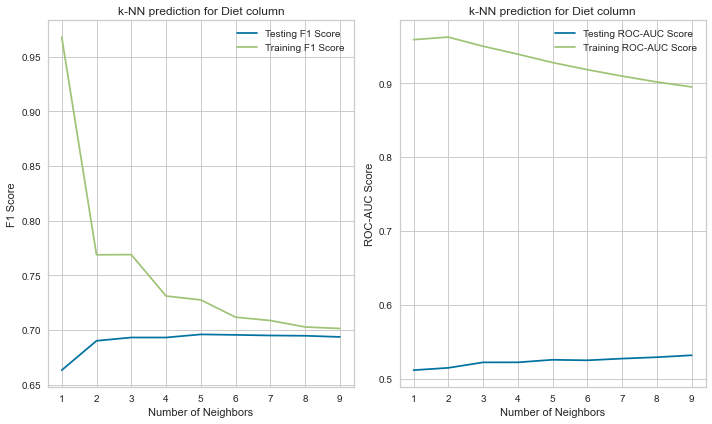

In [69]:
plt.figure(figsize=(10, 6))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
plt.title('k-NN prediction for Diet column')
plt.plot(neighbors, test_f1, label='Testing F1 Score')
plt.plot(neighbors, train_f1, label='Training F1 Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.savefig('diet_knn.png', bbox_inches='tight')

# Plotting ROC-AUC Scores
plt.subplot(1, 2, 2)
plt.title('k-NN prediction for Diet column')
plt.plot(neighbors, test_roc_auc, label='Testing ROC-AUC Score')
plt.plot(neighbors, train_roc_auc, label='Training ROC-AUC Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('ROC-AUC Score')

plt.tight_layout()
plt.show()